# Mount Google Drive

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


# Import libraries

In [ ]:
import os
import json
import gzip
from urllib.request import urlopen

In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Text_Mining")

In [3]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from heapq import nlargest
from textblob import TextBlob
import matplotlib.pyplot as plt
np.random.seed(100)

In [1]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/string/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/string/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/string/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/string/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

# Pre-process json

In [ ]:
data = []
with gzip.open('meta_CDs_and_Vinyl.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

544442
{'category': ['CDs & Vinyl', 'Christian'], 'title': 'Songs for the Shepherd', 'also_buy': ['B0016CP2GS', 'B0000075PB', 'B0000275QQ', 'B00000I7JO', '0001388312', 'B00P826ZRM', 'B00000I9AH', '1595551646', 'B00NYHPSZI', 'B000075A86', '0917143140', 'B0001YY7P4', 'B000BJSBR4', '5558154950', 'B00Z9HS7TU', '0736903208', 'B000008KJ3', 'B0002EZZMC', 'B00IDQ0C9C', 'B000002YVZ', '0006920055', 'B00083B7MO'], 'brand': 'Keith Green', 'rank': '123,896inCDsVinyl(', 'also_view': ['B0016CP2GS', 'B00000I7JO', 'B00000I9AH', 'B00P826ZRM', 'B0000275QQ', 'B0002EZZMC', 'B0000075PB', '0001388312', '1595551646', 'B0001YY7P4', 'B00412UE18', 'B000000V4U', 'B000GIVLLI', 'B000075A86', 'B00000053E', 'B000OJKH78', '1423442733', 'B002S1CJ2Q'], 'asin': '0001393774'}


In [ ]:
## convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)
print(len(df))

## remove rows with unformatted title (i.e. some 'title' may still contain html style content)
df3 = df.fillna('')
meta_unformatted = df3[df3.title.str.contains('getTime')] # unformatted rows
meta_formatted = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(meta_unformatted))
print(len(meta_formatted))

544442
6828
537614


In [ ]:
# how those unformatted rows look like
meta_unformatted.iloc[0]

category                    [CDs & Vinyl, Folk, Traditional Folk]
title           var aPageStart = (new Date()).getTime();\nvar ...
also_buy                                                         
brand                            Explorer Series: East Asia/Japan
rank                                           665,247inCDsVinyl(
also_view                                                        
asin                                                   B0013F2M84
main_cat                                                         
description     ['Flower Dance: Japanese Folk Melodies', the l...
price                                                            
image                                                            
details         \n  <div class="content">\n\n\n\n\n\n\n\n<ul>\...
feature                                                          
date                                                             
tech1                                                            
tech2     

In [ ]:
meta_formatted
meta_formatted.to_csv("meta_formatted.csv",index=False)

In [ ]:
## load the review data
data = []
with gzip.open('CDs_and_Vinyl.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
## total length of list, this number equals total number of products
print(len(data))

## first row of the list
print(data[0])

4543369
{'reviewerID': 'A171I27YBM4FL6', 'asin': '0001393774', 'reviewerName': 'Eline Mann', 'verified': True, 'reviewText': 'I love this CD.  So inspiring!', 'overall': 5.0, 'reviewTime': '04 29, 2016', 'summary': 'Five Stars', 'unixReviewTime': 1461888000}


In [ ]:
## convert list into pandas dataframe
review = pd.DataFrame.from_dict(data)
print(len(review))
review.to_csv("review.csv",index=False)

4543369


In [ ]:
import numpy as np
sum(review["vote"].isnull())

3230799

## Merge the 2 pre-processed dataframes and output for next time

In [ ]:
merge_df=review.merge(meta_formatted, 
                      how  = "left", 
                      on  = "asin" ).loc[:,["asin", "verified", "reviewText", 
                                            "overall", "summary", "vote",
                                            "category", "title", "brand", 
                                            "rank", "price"]]
merge_df.head(5)
merge_df.to_csv("merge_meta_review.csv",index=False)

In [ ]:
# remove rows of nan
sum(merge_df["reviewText"].isnull())

1636

# Normalized, Stopwords, Stemming

Converting all words to lowercase and removing punctuations and html tags if any

**Stemming**- Converting the words into their base word or stem word ( Ex - tastefully, tasty,  these words are converted to stem word called 'tasti'). This reduces the vector dimension because we dont consider all similar words  

**Stopwords** - Stopwords are the unnecessary words that even if they are removed the sentiment of the sentence dosent change.

Ex -    This pasta is so tasty ==> pasta tasty    ( This , is, so are stopwords so they are removed)

To see all the stopwords see the below code cell.

In [7]:
#text normalization function
%run Text_Normalization_Function.ipynb

Processing /root/.cache/pip/wheels/f5/5e/9f/dbce0d6a89f44b3f30fba0a9b1b24a288882ea2e235e515d7b/html_parser-0.2-cp36-none-any.whl
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_da

In [ ]:
merge_df=pd.read_csv("merged_verified_with_votes.csv")

In [ ]:
# # remove rows of nan
merge_df=merge_df.loc[merge_df["reviewText"].isnull()==False,]
print("done")

normalized_cd_corpus = normalize_corpus(merge_df["reviewText"]) 

### Output for next time

In [13]:
merge_df.drop(columns="reviewText").to_csv("merge_df_other_info.csv",index=False)
print("done")
pd.DataFrame(normalized_cd_corpus).to_csv("normalized_cd_corpus.csv",index=False)
print("done")
pd.DataFrame({"asin":merge_df["asin"],"normalized_cd_corpus":normalized_cd_corpus}).to_csv("normalized_asin_corpus.csv",index=False) ## two columns 
print("done")

done
done


# Topic Modeling

In [2]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [3]:
#normalize data
normalized_cd_corpus = pd.read_csv("normalized_cd_corpus.csv")

## Randomly sample 100,000 reviews from normalized_cd_corpus

In [4]:
#normalize data
normalized_cd_corpus = pd.read_csv("normalized_cd_corpus.csv")

import random
sampling = random.choices(normalized_cd_corpus['0'], k=100000)
pd.DataFrame(sampling).to_csv('sampling.csv',index=False)
sampling = pd.read_csv('sampling.csv')

## Latent Dirichlet Allocation function for 3, 5, 7 Topics successively.

In [7]:
normalized_cd_corpus=pd.read_csv("sampling.csv",dtype={"0":str})["0"].apply(lambda x: np.str_(x))
count_vect = CountVectorizer(max_features=1000)  
bow_data = count_vect.fit_transform(normalized_cd_corpus)

### 3 Topics Model (via Latent Dirichlet Allocation) 

In [ ]:
lda_corpus_3 = LatentDirichletAllocation(n_components=3, max_iter=100,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.3).fit(bow_data)

### 5 Topics Model (via Latent Dirichlet Allocation) 

In [20]:
lda_corpus_5 = LatentDirichletAllocation(n_components=5, max_iter=100,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.3).fit(bow_data)

In [21]:
no_top_words = 15
display_topics(lda_corpus_5, count_vect.get_feature_names(), no_top_words)

Topic 0:
band rock great guitar record best vocal live blue hit jazz time tune classic year
Topic 1:
album song like good really sound think track first much even time lyric well way
Topic 2:
music cd love song great hear voice buy time sing enjoy year favorite beautiful every
Topic 3:
music recording work performance piece sound play well piano musical hear first orchestra symphony record
Topic 4:
cd version sound good set original disc track release quality dvd record collection great buy


In [22]:
word_weights = lda_corpus_5.components_ / lda_corpus_5.components_.sum(axis=1)[:, np.newaxis]
pd.DataFrame(word_weights.T, index = count_vect.get_feature_names()).T

,2nd,60s,70s,80s,90s,ability,able,absolute,absolutely,accompany,...,worthy,wow,write,writing,wrong,year,yes,yet,york,young
0,4.313179e-07,2.040457e-03,3.284910e-03,2.904046e-03,9.899547e-04,7.523064e-04,4.372509e-07,0.000388,4.296754e-07,1.815070e-04,...,3.221384e-04,4.091250e-05,1.808959e-03,2.137527e-04,7.343069e-07,0.010065,1.067014e-03,0.000917,7.948109e-04,2.254746e-03
1,2.078069e-04,3.013655e-07,3.053287e-07,5.968364e-04,3.749238e-04,1.499823e-04,4.425795e-04,0.000101,3.406243e-04,3.084031e-07,...,3.897481e-04,1.585270e-04,2.695080e-03,4.932702e-04,1.747322e-03,0.000322,2.329539e-03,0.002768,3.002913e-07,3.100684e-07
2,4.333787e-07,4.418299e-07,4.269999e-07,4.322001e-07,4.273973e-07,1.786154e-04,1.608491e-03,0.000435,3.250529e-03,4.335853e-07,...,4.320566e-07,1.870951e-03,1.340603e-03,4.402503e-07,2.994322e-04,0.013513,4.419055e-07,0.000327,4.390169e-07,3.021845e-03
3,7.395462e-04,3.851729e-07,3.766475e-07,3.679337e-07,3.834659e-07,8.462668e-04,8.494538e-04,0.000260,5.780630e-04,1.217630e-03,...,4.484232e-04,3.905853e-07,4.456517e-03,5.811627e-04,6.101324e-05,0.002011,3.481519e-04,0.003106,5.702535e-04,1.083536e-03
4,4.152649e-04,2.641387e-04,4.942750e-07,4.286015e-05,4.743346e-05,4.596437e-07,6.537524e-04,0.000124,5.606845e-04,4.930248e-07,...,1.044610e-04,1.225714e-05,4.801816e-07,4.642970e-07,1.296141e-03,0.003129,9.409910e-04,0.000022,4.835767e-07,4.722329e-07


### 7 Topics Model (via Latent Dirichlet Allocation) 

In [ ]:
lda_corpus_7 = LatentDirichletAllocation(n_components=7, max_iter=100,
                                           doc_topic_prior = 0.9,
                                           topic_word_prior = 0.3).fit(bow_data)

## How To Find Dominant Topic in a Document

### Dominant Topic in 3 Topics

In [ ]:
lda_news_topic_weights = lda_corpus_3.transform(bow_data)
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(normalized_cd_corpus))]
topic_names = ["Topic_" + str(i) for i in range(3)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_news_topic_weights, 2), columns=topic_names, index=doc_names)

#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

### Dominant Topic in 5 Topics

In [24]:
lda_news_topic_weights = lda_corpus_5.transform(bow_data)
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(normalized_cd_corpus))]
topic_names = ["Topic_" + str(i) for i in range(5)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_news_topic_weights, 2), columns=topic_names, index=doc_names)

#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,dominant_topic
Doc_0,0.25,0.13,0.32,0.07,0.23,2
Doc_1,0.05,0.05,0.81,0.04,0.05,2
Doc_2,0.02,0.13,0.36,0.17,0.32,2
Doc_3,0.04,0.06,0.30,0.30,0.31,4
Doc_4,0.09,0.39,0.25,0.17,0.10,1
...,...,...,...,...,...,...
Doc_99995,0.59,0.09,0.04,0.19,0.08,0
Doc_99996,0.16,0.37,0.29,0.08,0.10,1
Doc_99997,0.34,0.47,0.06,0.03,0.10,1
Doc_99998,0.15,0.14,0.28,0.09,0.35,4


### Dominant Topic in 7 Topics

In [ ]:
lda_news_topic_weights = lda_corpus_7.transform(bow_data)
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(normalized_cd_corpus))]
topic_names = ["Topic_" + str(i) for i in range(7)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_news_topic_weights, 2), columns=topic_names, index=doc_names)

#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

## Topic Model Visualization

### 3 Topics Model Visualization

In [ ]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_corpus_3, bow_data , count_vect, mds='tsne')

### 5 Topics Model Visualization

In [25]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_corpus_5, bow_data , count_vect, mds='tsne')

# lamba = 0: topic 1 : rock topic 2: classic music topic 3:genre and singer  topic 4:ballad topic 5: format and quality
# lamba = 0.5: topic 1 : general evaluation topic 2: classic music topic 3: genre  topic 4:appreciation topic 5: format and quality 
# lamba = 1: topic 1 : general evaluation topic 2: classic music topic 3:genre topic 4:appreciation topic 5: format and quality 

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1       39.605427   45.080456       1        1  25.272541
3      152.933212   -7.874372       2        1  20.698673
0       88.800217 -110.377411       3        1  19.269662
2      -24.416998 -152.830490       4        1  17.971358
4      -53.737518  -31.226255       5        1  16.787766, topic_info=    Category          Freq      Term         Total  loglift  logprob
24   Default  92732.000000     album  92732.000000  30.0000  30.0000
120  Default  71879.000000        cd  71879.000000  29.0000  29.0000
562  Default  71344.000000     music  71344.000000  28.0000  28.0000
816  Default  82116.000000      song  82116.000000  27.0000  27.0000
496  Default  37439.000000      love  37439.000000  26.0000  26.0000
..       ...           ...       ...           ...      ...      ...
967   Topic5   7438.307633      well  32419.316293   0.3124  -4.5671
365   Topic5   8567.177292     great  52122.410099  -0.0211  -4.4258
681   Topic5   4350.839496  purchase   8122.828977   1.1602  -5.1034
734   Topic5   4434.285222    review   9070.447188   1.0689  -5.0844
320   Topic5   4444.002134     first  28232.924753  -0.0644  -5.0822

[332 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         3  0.999533      70s
24        1  0.985930    album
24        3  0.014062    album
34        1  0.102252  amazing
34        2  0.003121  amazing
...     ...       ...      ...
995       1  0.015091     year
995       2  0.077195     year
995       3  0.359752     year
995       4  0.450517     year
995       5  0.097418     year

[660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

### 7 Topics Model Visualization

In [ ]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_corpus_7, bow_data , count_vect, mds='tsne')

## Topic Model Evaluation: Log-likelihood, Perplexity and Coherence Scores

In [26]:
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

## Coherence score 

### 3 Topics

In [ ]:
#tokenizing the corpus
news_corpus_tokenized = [tokenize_text(normalized_cd_corpus[doc_id]) for doc_id in range(len(normalized_cd_corpus))]

#Dictionary of the corpus:
news_dictionary = Dictionary(news_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = count_vect, lda_model = lda_corpus_3, n_words=20)

cm = CoherenceModel(topics=topic_topwords, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4))  

print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))

### 5 Topics

In [28]:
#tokenizing the corpus
news_corpus_tokenized = [tokenize_text(normalized_cd_corpus[doc_id]) for doc_id in range(len(normalized_cd_corpus))]

#Dictionary of the corpus:
news_dictionary = Dictionary(news_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = count_vect, lda_model = lda_corpus_5, n_words=20)

cm = CoherenceModel(topics=topic_topwords, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4))  # get coherence value

Coherence score for the model:  -1.6868


In [29]:
print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))

Coherence score by topic (higher values are better):  [-1.691  -1.483  -1.7701 -1.7831 -1.7069]


### 7 Topics

In [ ]:
#tokenizing the corpus
news_corpus_tokenized = [tokenize_text(normalized_cd_corpus[doc_id]) for doc_id in range(len(normalized_cd_corpus))]

#Dictionary of the corpus:
news_dictionary = Dictionary(news_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]

#top 20 words for each topic (using the function defined in session prep)
topic_topwords = get_topic_words(vectorizer = count_vect, lda_model = lda_corpus_7, n_words=20)

cm = CoherenceModel(topics=topic_topwords, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm.get_coherence(), 4)) 

print("Coherence score by topic (higher values are better): ", np.round(cm.get_coherence_per_topic(),4))

## Log-Likelihood Score

### 3 Topics

In [ ]:
print("Log-Likelihood (higher values are better): ", lda_corpus_3.score(bow_data))

### 5 Topics

In [30]:
print("Log-Likelihood (higher values are better): ", lda_corpus_5.score(bow_data))

Log-Likelihood (higher values are better):  -26558455.66116012


### 7 Topics

In [ ]:
print("Log-Likelihood (higher values are better): ", lda_corpus_7.score(bow_data))

## Perplexity Score

### 3 Topics

In [ ]:
print("Perplexity (lower values are better): ", lda_corpus_3.perplexity(bow_data))

### 5 Topics

In [31]:
print("Perplexity (lower values are better): ", lda_corpus_5.perplexity(bow_data))

Perplexity (lower values are better):  506.0233830751827


### 7 Topics

In [ ]:
print("Perplexity (lower values are better): ", lda_corpus_7.perplexity(bow_data))

# Sentiment Analysis

## Feature Extraction

In [ ]:
normalized_cd_corpus=pd.read_csv("normalized_cd_corpus.csv",dtype={"0":str})["0"].apply(lambda x: np.str_(x))

### Split dataset

In [ ]:
other_info=pd.read_csv("merge_df_other_info.csv")
polarity=other_info["overall"]
product=other_info["brand"]

from sklearn.model_selection import train_test_split
train_reviews, test_reviews, train_polarity, test_polarity,train_product,test_product = train_test_split(normalized_cd_corpus, 
                                                                                                         polarity, 
                                                                                                         test_size=0.2)

In [ ]:
def get_polarity(score):
    if score>3:
        return "positive"
    elif score==3:
        return "neutral"
    else:
        return "negative"

train_polarity=train_polarity.apply(get_polarity)
test_polarity=test_polarity.apply(get_polarity)

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Bag-of-words
Limit the number of features to 1000 most frequent features.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000) 
feature_matrix_TRAIN = vectorizer.fit_transform(train_reviews).astype(float)

In [105]:
feature_matrix_TRAIN_names = vectorizer.get_feature_names()
feature_matrix_TRAIN_names

['2nd',
 '60s',
 '70s',
 '80s',
 '90s',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'accompany',
 'acoustic',
 'across',
 'act',
 'actual',
 'actually',
 'add',
 'addition',
 'admit',
 'age',
 'ago',
 'agree',
 'ahead',
 'air',
 'al',
 'album',
 'alive',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'although',
 'always',
 'amaze',
 'amazing',
 'amazon',
 'america',
 'american',
 'among',
 'angel',
 'another',
 'anyone',
 'anything',
 'anyway',
 'appeal',
 'appear',
 'appreciate',
 'approach',
 'around',
 'arrangement',
 'arrive',
 'art',
 'artist',
 'attempt',
 'attention',
 'audience',
 'audio',
 'available',
 'away',
 'awesome',
 'baby',
 'bach',
 'background',
 'bad',
 'balance',
 'ballad',
 'band',
 'bar',
 'base',
 'bass',
 'beach',
 'bear',
 'beat',
 'beatles',
 'beautiful',
 'beautifully',
 'beauty',
 'become',
 'beethoven',
 'begin',
 'beginning',
 'behind',
 'believe',
 'best',
 'beyond',
 'big',
 'bill',
 'billy',
 'bit',
 'black',
 'blend',
 'blow',
 'blue',
 

In [ ]:
feature_matrix_TEST = vectorizer.transform(test_reviews)

## SVM Classifier

In [ ]:
from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, train_polarity)
predicted_svm = svm.predict(feature_matrix_TEST)

In [29]:
from sklearn import metrics
print('Accuracy rate:', np.round(metrics.accuracy_score(test_polarity, predicted_svm), 3))

Accuracy rate: 0.864


## Lexicon-based Score

In [ ]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    # binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    non_binary_sentiment = ('positive' if scores['compound'] > threshold else 'negative') if scores['compound']!=threshold else "neutral"

    if verbose:                             
        # print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Polarity:', non_binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return non_binary_sentiment,scores['compound']  

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1)\
                       for review in test_reviews]

In [48]:
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df

,VADER Polarity,VADER Score
0,positive,0.9100
1,positive,0.9623
2,positive,0.9895
3,positive,0.7096
4,positive,0.7506
...,...,...
88172,positive,0.9287
88173,positive,0.9509
88174,positive,0.9627
88175,positive,0.2500


### Crosstab

In [28]:
pd.crosstab(pd.Series(test_polarity), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,90,1308,1398
neutral,79,1066,1145
positive,1025,14139,15164
All,1194,16513,17707


### The threshold value that maximizes

In [38]:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = [('positive' if s > threshold_for_pos else 'negative') if s!=threshold_for_pos else "neutral" for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(test_polarity, VADER_binary_polarity)
    return(accuracy) 

def try_threshold_for_precision(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = [('positive' if s > threshold_for_pos else 'negative') if s!=threshold_for_pos else "neutral" for s in list(sentiment_scores)]
    precision=np.round(metrics.precision_score(test_polarity, VADER_binary_polarity, pos_label='positive',average="micro"), 3)
    return(precision) 

def try_threshold_for_recall(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = [('positive' if s > threshold_for_pos else 'negative') if s!=threshold_for_pos else "neutral" for s in list(sentiment_scores)]
    recall=np.round(metrics.recall_score(test_polarity, VADER_binary_polarity, pos_label='positive',average="micro"), 3)
    return(recall)  


The threshold value that maximizes the prediction accuracy rate is -0.415.
The threshold value that maximizes the precision of the prediction is -0.421.
The threshold value that maximizes the recall rate of the prediction is -0.421.


In [ ]:
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]
pre_rates=[try_threshold_for_precision(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]
recall_rates=[try_threshold_for_recall(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

acc_thresh=thresholds[acc_rates.index(max(acc_rates))]
pre_thresh=thresholds[pre_rates.index(max(pre_rates))]
recall_thresh=thresholds[recall_rates.index(max(recall_rates))]

print(f"The threshold value that maximizes the prediction accuracy rate is {round(acc_thresh,3)}.")
print(f"The threshold value that maximizes the precision of the prediction is {round(pre_thresh,3)}.")
print(f"The threshold value that maximizes the recall rate of the prediction is {round(recall_thresh,3)}.")

### The maximized rates

In [43]:
print(f"The maximized prediction accuracy rate is {max(acc_rates)}.")
print(f"The maximized precision of the prediction is {max(pre_rates)}.")
print(f"The maximized recall rate of the prediction is {max(recall_rates)}.")

The prediction accuracy rate is 0.849541263594815.
The precision of the prediction is 0.85.
The recall rate of the prediction is 0.85.


In [110]:
VADER_polarity_best_test = [analyze_sentiment_vader_lexicon(review, threshold=-0.415)\
                            for review in test_reviews]
VADER_polarity_best_test_df = pd.DataFrame(VADER_polarity_best_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_best_test_df

,VADER Polarity,VADER Score
0,positive,-0.3999
1,positive,0.4125
2,positive,0.6486
3,positive,0.0000
4,positive,0.0000
...,...,...
88172,positive,0.9839
88173,positive,0.9726
88174,positive,0.8074
88175,positive,0.3182


### Plots of rates

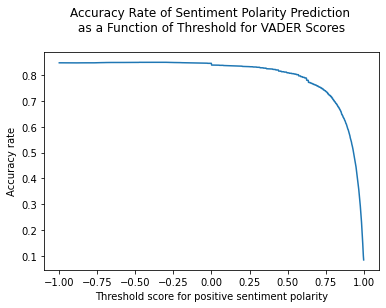

In [40]:
import matplotlib.pyplot as plt

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

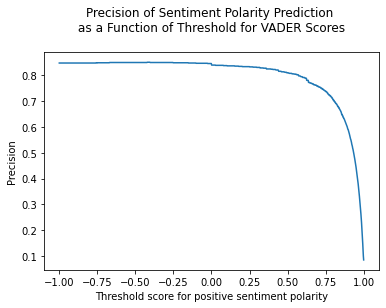

In [41]:
## Precision
plt.plot(thresholds, pre_rates)
plt.xlabel("Threshold score for positive sentiment polarity")
plt.ylabel("Precision")
plt.title("Precision of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

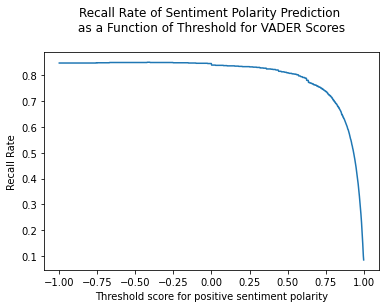

In [42]:
## Recall
plt.plot(thresholds, recall_rates)
plt.xlabel("Threshold score for positive sentiment polarity")
plt.ylabel("Recall Rate")
plt.title("Recall Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

## Word Weights

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_corpus_5 = LatentDirichletAllocation(n_components=5, max_iter=100,
                                         doc_topic_prior = 0.9,
                                         topic_word_prior = 0.3).fit(feature_matrix_TEST)

In [ ]:
#lda_news_topic_weights_TRAIN = lda_corpus_5.transform(feature_matrix_TRAIN)
lda_news_topic_weights_TEST = lda_corpus_5.transform(feature_matrix_TEST)

#pd.DataFrame(lda_news_topic_weights_TRAIN).to_csv("lda_news_topic_weights_TRAIN.csv",index=False)
pd.DataFrame(lda_news_topic_weights_TEST).to_csv("lda_news_topic_weights_TEST.csv")


### Match the topic names with topic modeling results

In [38]:
no_top_words = 15
display_topics(lda_corpus_5, vectorizer.get_feature_names(), no_top_words)

Topic 0:
sound version record track set original disc release cd collection quality good include hit well
Topic 1:
recording music work performance play piece sound jazz well piano hear first musical symphony orchestra
Topic 2:
song music love voice sing like beautiful artist singer life know favorite wonderful time every
Topic 3:
album song like band track sound rock good guitar vocal time first really best new
Topic 4:
cd great buy hear good fan time play year live really best dvd like show


### Fixed-Effect Regression on Topics
To find out which topic is more focused on when positive reviews are more easily given. To make it faster, we use test dataset to run the regression.

In [ ]:
artist=other_info["brand"]
test_score=VADER_polarity_best_test_df["VADER Score"]
test_artist=artist[test_polarity.index].fillna("John Doe").reset_index(drop=True)

In [57]:
other_info.columns

Index(['asin', 'overall', 'summary', 'vote', 'category', 'title', 'brand',
       'rank', 'price'],
      dtype='object')

In [122]:
## Train:
## topic_names = ["general evaluation","classic music","genre",\
##                "appreciation","format and quality"]
column_names=["quality","classic","appreciation","genre","eval","score","artist"]

lda_topic_weights_TEST=pd.read_csv("lda_news_topic_weights_TEST.csv").iloc[:,1:]

lda_topic_weights_TEST= pd.concat([lda_news_topic_weights_TEST,test_score,test_artist],axis=1).reset_index(drop=True)
lda_topic_weights_TEST.columns=column_names
lda_topic_weights_TEST

,quality,classic,appreciation,genre,eval,score,artist
0,0.089026,0.080445,0.122314,0.473549,0.234665,-0.3999,Lifehouse
1,0.050883,0.059167,0.615599,0.061678,0.212674,0.4125,Susan Boyle
2,0.129650,0.152409,0.269436,0.112840,0.335665,0.6486,Johnny Cash
3,0.243790,0.128635,0.129401,0.377990,0.120184,0.0000,Leon Russell
4,0.079376,0.261324,0.209773,0.132138,0.317389,0.0000,Gregorio Paniagua
...,...,...,...,...,...,...,...
88172,0.396120,0.291942,0.215556,0.053322,0.043060,0.9839,Various Artists
88173,0.123409,0.230862,0.179149,0.416377,0.050204,0.9726,Jami Seiber
88174,0.107776,0.163003,0.221497,0.406313,0.101411,0.8074,Vangelis
88175,0.305797,0.102754,0.106360,0.210742,0.274347,0.3182,Beyonce


In [124]:
# !pip install statsmodels
# regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

## linear fixed effect model
felm = smf.mixedlm(" score~ quality+classic+appreciation+genre+eval", 
                 data=lda_topic_weights_TEST, 
                 groups=lda_topic_weights_TEST["artist"])
felmf = felm.fit()
print(felmf.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   score      
No. Observations:   88177     Method:               REML       
No. Groups:         22562     Scale:                0.1167     
Min. group size:    1         Likelihood:           -32960.0056
Max. group size:    2817      Converged:            No         
Mean group size:    3.9                                        
---------------------------------------------------------------
             Coef.   Std.Err.   z    P>|z|   [0.025     0.975] 
---------------------------------------------------------------
Intercept    -1.538 21529.928 -0.000 1.000 -42199.420 42196.345
quality       2.048 21529.928  0.000 1.000 -42195.835 42199.931
classic       2.473 21529.928  0.000 1.000 -42195.410 42200.356
appreciation  2.483 21529.928  0.000 1.000 -42195.399 42200.366
genre         2.343 21529.928  0.000 1.000 -42195.540 42200.226
eval          2.220 21529.928  0.000 1.000 -42195.663

# Sentiment Analysis - another method

### Extract Aspect - words with top occurance

In [4]:
df = pd.read_csv("Final_data.csv")
Corpus = df["normalized"]
def get_aspect(reviews):
    dic = {}
    STOPWORDS = set(stopwords.words('english'))
    for review in reviews:
        if type(review) == str: ###还是有nan(float)
            words = review.split()
            for word in words:
                if word in dic.keys()and word not in STOPWORDS:
                    dic[word] = dic[word]+1
                else:
                    dic[word] = 1
    dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
    return dic
Top_words = get_aspect(Corpus) #words and count
Top_100_words = nlargest(100,Top_words,key=Top_words.get) #only words
#Top nouns
Top_nouns = [] 
for word in Top_100_words:
    key_type = TextBlob(word).tags[0][1]
    if key_type == "NN" or key_type == "NNP":
        Top_nouns.append(word)
#top nouns with count
Top_noun_count = {}
for i in Top_nouns:
    Top_noun_count[i] = Top_words[i]
Top_noun_count 

{'album': 413309,
 'song': 367446,
 'music': 319150,
 'cd': 318224,
 'sound': 217663,
 'love': 169702,
 'time': 163417,
 'track': 150633,
 'hear': 146577,
 'record': 117562,
 'band': 116241,
 'play': 110907,
 'work': 110080,
 'fan': 102320,
 'year': 101586,
 'release': 89359,
 'think': 86806,
 'version': 81889,
 'voice': 80323,
 'set': 79279,
 'rock': 73808,
 'way': 72189,
 'performance': 69451,
 'disc': 67358,
 'collection': 63819,
 'want': 61411,
 'favorite': 61350,
 'guitar': 60273,
 'show': 58508,
 'enjoy': 56970,
 'quality': 55340,
 'include': 54920,
 'day': 52202,
 'thing': 49443,
 'dvd': 49075,
 'star': 46733,
 'look': 46368,
 'feel': 46339,
 'beautiful': 46183,
 'seem': 45917,
 'use': 45755,
 'hit': 45566,
 'lyric': 43405,
 'excellent': 42480,
 'recommend': 42316,
 'piece': 42120,
 'lot': 41570,
 'write': 41080,
 'artist': 40998,
 'put': 40987,
 'note': 40811,
 'review': 40676,
 'style': 40437,
 'something': 40139,
 'blue': 39832,
 'jazz': 38700,
 'wonderful': 38592,
 'end': 37

#### Our conclusion: aspects can be grouped this way
##### The album itself: 
album, song, music, sound, track, record, collection, dvd <br />
##### Other attributes of the CD: 
band, voice, way, guitar, lyric, artist, style, tune<br />
##### Music genre: 
rock, jazz<br />
##### Overall evaluation: 
performance, quality, star, look, feel, use, work<br />

### Read Lexicons

In [5]:
# read in the Lexicons
PATH_TO_LEXICONS = "/Users/xinyifang/Desktop/Amazon Reviews"
pos_path = PATH_TO_LEXICONS + "/Liu/positive-words.txt"
neg_path = PATH_TO_LEXICONS + "/Liu/negative-words.txt"

def read_lexicon(path):
	start_read = False
	lexicon = set()
	with open(path, 'r',encoding = "ISO-8859-1") as f:
# 	with open(path, 'r') as f: 
		for line in f: 
			if start_read:
				lexicon.add(line.strip())
			if line.strip() == "":
				start_read = True
	return lexicon

pos_lex = read_lexicon(pos_path)
neg_lex = read_lexicon(neg_path)

### Predict Score
Here we try to measure sentiment score by the proportion of absolute number of positive words(number of positive words minus number of negative words) to number of words tokenized sentence.

In [6]:
def predict(tokenized_sent): #input: a reveiw split by word， not a whole sentence.
	doc_len = len(tokenized_sent)
	assert doc_len > 0, "Can't featurize document with no tokens." 
	num_pos = sum([1 if tok in pos_lex else 0 for tok in tokenized_sent]) #number of positive lexicons in the sentence
	num_neg = sum([1 if tok in neg_lex else 0 for tok in tokenized_sent])
	score = (num_pos - num_neg)/doc_len #no range, can only compare high/low
	return score

In [7]:
def score(sentence):
	tokenized_sentence = sentence.split()
	score = predict(tokenized_sentence)
	return score

In [46]:
## Demo
tokenized_1 = "really love album. recommend"
tokenized_2 = "disgusting music and record, bad. however cheap"
(score(tokenized_1),score(tokenized_2))

(0.5, -0.2857142857142857)

### Get Score by Aspect

In [48]:
def get_review_by_aspect(aspect,reviews): # from many reviews, get reviews which contain the aspect
    review_selected = []
    for review in reviews:
        if type(review)==str:
            words = review.split()
            if aspect in words:
                review_selected.append(review)
    return review_selected #return the review if it contains the aspect.

In [43]:
def score_aspect(reviews, aspect):  # From a set of reviews, get the score of aspect of these reviews
    aspect_sentences = get_review_by_aspect(aspect, reviews)
    scores = [score(sent) for sent in aspect_sentences]
    return scores
    #return np.mean(scores)

In [54]:
## Demo
reviews = df["normalized"]
# get_review_by_aspect("lyric",reviews) 
scores_song = score_aspect(reviews,"song")
scores_lyric = score_aspect(reviews,"lyric")

In [56]:
len(scores_song),len(scores_lyric)

(161303, 32149)

There are 161303 reviews mention the aspect "song", 32149 reviews mention the aspect "lyric".<br />
Let's see the distribution of scores

### Distribution of Scores

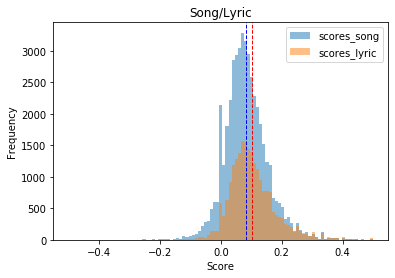

In [96]:
def mean(list):
    avg = sum(list)/len(list)
    return avg

x = scores_song
y = scores_lyric

bins = np.linspace(-0.5, 0.5, 100)

plt.hist(x, bins, alpha=0.5, label='scores_song')
plt.hist(y, bins, alpha=0.5, label='scores_lyric')
plt.legend(loc='upper right')
plt.axvline(mean(x), color='b', linestyle='dashed', linewidth=1) 
plt.axvline(mean(y), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Song/Lyric')
plt.show()

Comparing to people who mentioned "song" in their reviews, people mentioned "lyric" are very few. Meanwhile, people's attitude towards lyric is a little bit lower than song. <br />
Let's see another example.

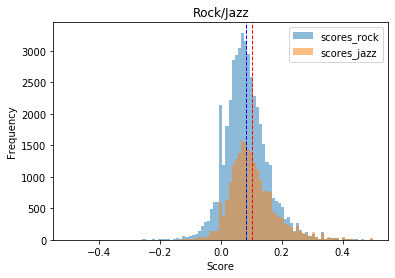

In [97]:
scores_rock = score_aspect(reviews,"rock")
scores_jazz = score_aspect(reviews,"jazz")
x = scores_rock
y = scores_jazz

bins = np.linspace(-0.5, 0.5, 100)

plt.hist(x, bins, alpha=0.5, label='scores_rock')
plt.hist(y, bins, alpha=0.5, label='scores_jazz')
plt.legend(loc='upper right')
plt.axvline(mean(x), color='b', linestyle='dashed', linewidth=1) 
plt.axvline(mean(y), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Rock/Jazz')
plt.show()

Comparing to people who mentioned "rock" in their reviews, people mentioned "jazz" are very few. Meanwhile, people's attitude towards rock is a little bit lower than jazz. This tells us that rock is more popular among people but people's overall preference for jazz is higher than rock music. <br \>

Let's see how people mention quality.

Text(0.5, 1.0, 'Quality')

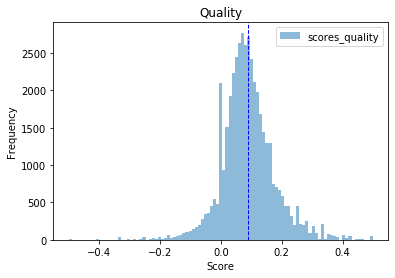

In [98]:
scores_quality = score_aspect(reviews,"quality")
x = scores_quality
bins = np.linspace(-0.5, 0.5, 100)
plt.hist(x, bins, alpha=0.5, label='scores_quality')
plt.legend(loc='upper right')
plt.axvline(mean(x), color='b', linestyle='dashed', linewidth=1) 
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Quality')

I used to think when people mentioned quality, they must be complaining about it. From the distribution, we can see it's not the case. The majority of people mentioning quality provide positive review (score higher than 0). People like to praise the quality of CD rather than just complaining about it.

### Analyze review by product
Let's check one product: <br />
I Dreamed A Dream (product_id:B0026P3G12) ----->1 

In [123]:
def get_review_by_product(product_id):
    reviews = []
    for index,row in df.iterrows():
        if row["asin"]==product_id:
            reviews.append(row["normalized"])
    return reviews

In [124]:
reviews_1 = get_review_by_product("B0026P3G12") #I Dreamed A Dream

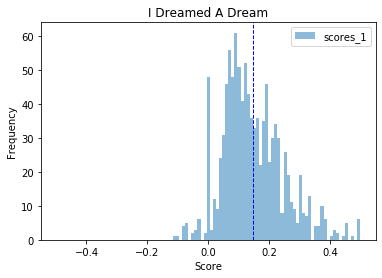

In [125]:
#The scores that mention all aspect about the CD it self
scores_1 = score_aspect(reviews_1,"album") + score_aspect(reviews_1,"song") +score_aspect(reviews_1,"music")\
    + score_aspect(reviews_1,"sound") + score_aspect(reviews_1,"track") + score_aspect(reviews_1,"record")\
    + score_aspect(reviews_1,"collection") + score_aspect(reviews_1,"dvd")
x = scores_1

bins = np.linspace(-0.5, 0.5, 100)

plt.hist(x, bins, alpha=0.5, label='scores_1')
plt.legend(loc='upper right')
plt.axvline(mean(x), color='b', linestyle='dashed', linewidth=1) 
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('I Dreamed A Dream')
plt.show()

I Dreamed A Dream is the CD that have most reviews in our dataset. It was released on 23 November 2009. In only six weeks of sales, it became the biggest selling album in the world for 2009. From our scores, we can also tell that people like it. Lots of people buy it and most of them hold positive view on it.